# Prediction on test set

---

In [2]:
from keras.models import Model, load_model, Sequential
from keras.models import model_from_json

In [3]:
# Model reconstruction from JSON file
with open('../models/model_architecture.json', 'r') as f:
    model = model_from_json(f.read())

model.load_weights('../models/model_weight.h5')

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 1101, 101)         0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 272, 196)          297136    
_________________________________________________________________
batch_normalization_11 (Batc (None, 272, 196)          784       
_________________________________________________________________
activation_3 (Activation)    (None, 272, 196)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 272, 196)          0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 272, 256)          332800    
_________________________________________________________________
dropout_12 (Dropout)         (None, 272, 256)          0         
__________

---

In [10]:
import IPython

import numpy as np
import matplotlib.pyplot as plt

from scipy.io import wavfile

In [11]:
def graph_spectrogram(wav_filename, rate=None, data=None):
    ''' Calculate and plot spectrogram for a wav audio file. '''
    if data is None:
        rate, data = get_wav_info(wav_filename)
    nfft = 200 # Length of each window segment
    fs = 8000 # Sampling frequencies
    noverlap = 120 # Overlap between windows
    nchannels = data.ndim
    if nchannels == 1:
        pxx, freqs, bins, im = plt.specgram(data, nfft, fs, noverlap = noverlap)
    elif nchannels == 2:
        pxx, freqs, bins, im = plt.specgram(data[:,0], nfft, fs, noverlap = noverlap)
    return pxx

def get_wav_info(wav_filename):
    ''' Load a wav file. '''
    rate, data = wavfile.read(wav_filename)
    return rate, data

def predict(model, wav_filename, show_graphs=False):
    if show_graphs:
        plt.subplot(2, 1, 1)  # spectrogram on top

    x = graph_spectrogram(wav_filename)

    # the spectogram outputs (freqs, Tx) and we want (Tx, freqs) to input into the model
    x = x.swapaxes(0,1)
    x = np.expand_dims(x, axis=0)

    predictions = model.predict(x)

    if show_graphs:
        plt.subplot(2, 1, 2)  # probability plot at the bottom
        plt.plot(predictions[0,:,0])
        plt.ylabel('probability')
        plt.show()

    return predictions

---

# Music and dialog

In [16]:
wav_filename = '../data/test_set_wav/test_with_dialog_00110.wav'
IPython.display.Audio(wav_filename)

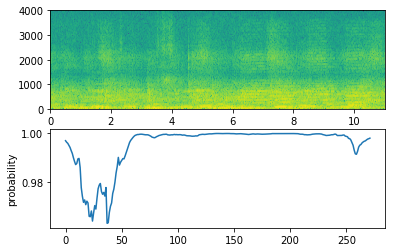

In [17]:
predictions = predict(model, wav_filename, show_graphs=True)

---

In [54]:
wav_filename = '../data/test_set_wav/test_with_dialog_00134.wav'
IPython.display.Audio(wav_filename)

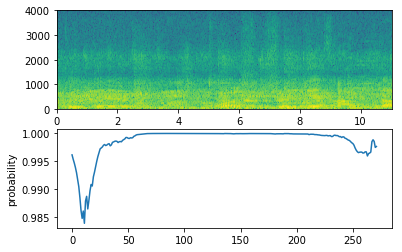

In [55]:
predictions = predict(model, wav_filename, show_graphs=True)

# Music Only

In [21]:
wav_filename = '../data/test_set_wav/test_without_dialog_00406.wav'
IPython.display.Audio(wav_filename)

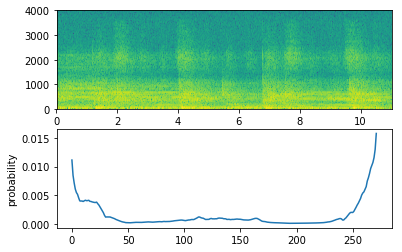

In [22]:
predictions = predict(model, wav_filename, show_graphs=True)

---

In [51]:
wav_filename = '../data/test_set_wav/test_without_dialog_00420.wav'
IPython.display.Audio(wav_filename)

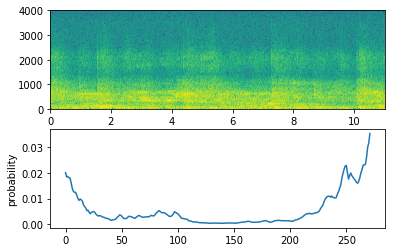

In [52]:
predictions = predict(model, wav_filename, show_graphs=True)

---

# Live Recording

In [25]:
from pydub import AudioSegment

In [46]:
wav_2s_filename = 'audio_examples/live_speech_2s_00002.wav'

In [47]:
wav_10s_filename = 'audio_examples/live_dialog_00002.wav'
audio_10s = AudioSegment.from_wav(wav_10s_filename)

chunk_2s = audio_10s[3000:5000]

with open(wav_2s_filename, "wb") as f:
    chunk_2s.export(f, format='wav')

In [48]:
IPython.display.Audio(wav_2s_filename)

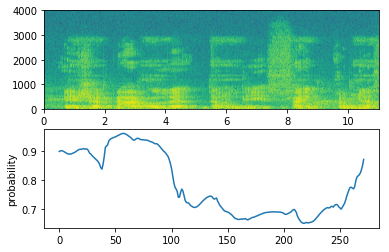

In [49]:
predictions = predict(model, wav_2s_filename, show_graphs=True)

---

In [56]:
wav_2s_filename = 'audio_examples/live_speech_2s_00001.wav'
IPython.display.Audio(wav_2s_filename)

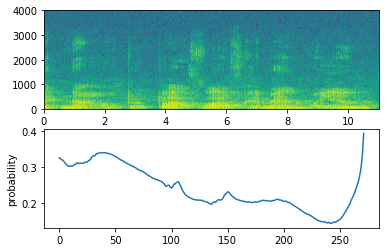

In [57]:
predictions = predict(model, wav_2s_filename, show_graphs=True)